In [1]:
import gymnasium as gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('LunarLander-v3', render_mode='rgb_array')

num_episodes = 100
max_memory_size = 1024 * 16
batch_size = 64

In [2]:
from models import NaiveDeepQNetwork, ReplayMemory

dqn = NaiveDeepQNetwork(env)
memory = ReplayMemory(max_memory_size)

/Users/bread/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


KeyboardInterrupt: 

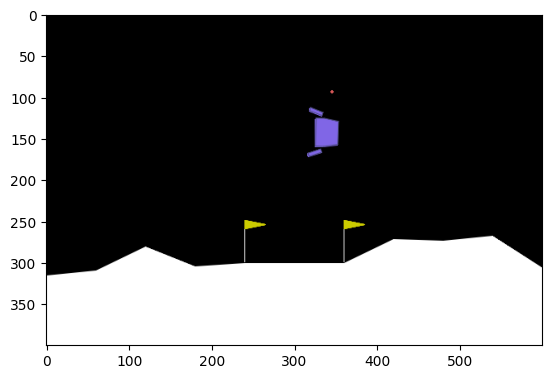

In [3]:
total_rewards = []

for _ in range(num_episodes):
    obs, info = env.reset()
    img = plt.imshow(env.render()) # only call this once
    tr = 0

    while True:
        action = dqn.take_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # train model
        memory.push(obs, action, reward, next_obs, terminated)
        transitions = memory.sample(batch_size)
        dqn.train(transitions)

        # update env. display
        img.set_data(env.render()) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)

        if terminated:
            break

        next_obs = obs
        tr += reward

    total_rewards.append(tr)
    

In [9]:
total_rewards


[-448.41673996460435,
 -994.6943560021289,
 -360.66675439917304,
 -410.69565818458824,
 -440.76777124887957,
 -482.569265905474,
 -312.20285980487165,
 -392.9668632907534,
 -540.2692862233022,
 -9.762277018033345,
 -4.510815708433167,
 -71.13015623246292,
 -20.326371235935994,
 -31.481362856145367,
 6.0292702922265775,
 44.93548490653805,
 -816.7276611997331,
 -327.44390699416766,
 -599.4521797878473,
 -863.0327073946195,
 -342.16462298890997,
 -436.41175704719876,
 36.184020308955276,
 -189.3232877339718,
 -47.10742599923523,
 -199.39502784385724,
 -72.34437942370599,
 49.07948338047575,
 -52.17718017597032,
 -33.77971475616531,
 -463.9217170368829,
 -53.531076717907425,
 -182.84364940403222,
 -46.81153068736981,
 -231.1755026897468,
 -85.58837241636611,
 12.175070943330692,
 -73.52493753398952,
 -39.71804879948693,
 -42.704487795370866,
 11.509341993640305,
 -16.49646362095855,
 -164.44653893241735,
 -359.8857136857401,
 -477.75633398343973,
 -240.92779652649907,
 -183.78493037610647